## Implementation

# Data Understanding



Import Libraries
 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [ ]:
data = pd.read_csv("Data.csv",nrows=96)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Gold,10,4,7
92,93,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Green,10,4,7
93,94,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.0,7.0,Gold,10,17,5
94,95,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Gold,10,17,7


In [ ]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Extra_interface_1    float64
Extra_interface_2    float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 96 non-null     int64  
 1   Name               96 non-null     object 
 2   Gender             96 non-null     object 
 3   Field              96 non-null     object 
 4   Occupation         96 non-null     object 
 5   Age                96 non-null     int64  
 6   Openness           96 non-null     float64
 7   Extraversion       96 non-null     float64
 8   Agreeableness      96 non-null     float64
 9   Conscientiousness  96 non-null     float64
 10  Neuroticism        96 non-null     float64
 11  Interface_1        96 non-null     float64
 12  Interface_2        96 non-null     float64
 13  Interface_3        96 non-null     float64
 14  Interface_4        96 non-null     float64
 15  Interface_5        96 non-null     float64
 16  Interface_6        96 non-nu

In [ ]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [ ]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [ ]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Extra_interface_1    7.291667
Extra_interface_2    7.291667
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [ ]:
data['Extra_interface_1'].fillna(value=data['Extra_interface_1'].mean(), inplace=True)

In [ ]:
data['Extra_interface_2'].fillna(value=data['Extra_interface_2'].mean(), inplace=True)


In [ ]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Extra_interface_1    0.0
Extra_interface_2    0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [ ]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3])

In [ ]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,48.500000,22.270833,4.036458,3.239583,3.489583,2.609375,3.338542,6.822917,6.033333,5.993750,...,6.510417,6.479167,7.083333,7.961458,6.152809,6.114607,1.593750,9.708333,10.739583,10.604167
std,27.856777,6.084457,0.840566,1.256518,0.885495,1.433074,1.257598,1.707536,1.952416,1.983236,...,2.284938,2.331610,1.736098,1.778667,2.070296,2.057773,1.062055,4.497758,5.388574,5.232448
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,24.750000,20.750000,3.000000,2.000000,3.000000,1.000000,2.375000,6.000000,5.000000,5.000000,...,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,1.000000,7.000000,7.000000,7.000000
50%,48.500000,21.000000,4.000000,3.000000,3.000000,2.500000,3.000000,7.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,8.000000,6.152809,6.114607,2.000000,10.000000,10.500000,10.500000
75%,72.250000,21.250000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,8.000000,8.000000,8.000000,9.000000,8.000000,7.050000,2.000000,13.000000,16.000000,16.000000
max,96.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,19.000000,19.000000,19.000000


# Machine learning 

In [ ]:
y = data['Test_Score']
y
x = data.drop(['Test_Score','Name','Occupation','Gender','Field','Top_1','Top_2','Top_3','Id'],axis = 1)
x



,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2
0,21,3.0,2.0,4.0,5.0,4.0,6.0,6.0,5.0,5.0,...,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000
1,21,4.0,5.0,3.0,2.0,1.0,8.0,7.0,7.0,6.0,...,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000
2,23,5.0,4.0,3.0,3.0,3.0,9.0,8.5,7.0,6.0,...,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000
3,20,4.0,3.0,5.0,5.0,1.0,6.0,5.5,5.0,6.0,...,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000
4,19,4.0,2.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,...,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.152809,6.114607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,21,5.0,4.0,4.0,1.0,4.0,6.0,5.0,6.0,8.0,...,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.000000,7.000000
92,21,5.0,4.0,4.0,1.0,4.0,6.0,5.0,6.0,8.0,...,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.000000,7.000000
93,23,3.0,3.0,4.0,2.0,3.0,6.0,5.0,4.0,7.0,...,9.0,7.0,5.0,7.0,7.0,6.0,8.0,9.0,6.000000,7.000000
94,21,3.0,1.0,3.0,1.0,3.0,4.0,4.0,3.0,5.0,...,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.000000,4.000000


In [ ]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=20)


Logistic 

In [ ]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)



In [ ]:
accuracy_score(y_test, y_pred_lgr)*100


41.37931034482759

In [ ]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.27      0.35        11
           2       0.38      0.56      0.45         9
           3       0.29      0.40      0.33         5

    accuracy                           0.41        29
   macro avg       0.46      0.43      0.43        29
weighted avg       0.45      0.41      0.41        29



Decision Tree

In [ ]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)



In [ ]:
accuracy_score(y_test, y_pred_tree)*100

17.24137931034483

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         4
           1       0.14      0.09      0.11        11
           2       0.25      0.22      0.24         9
           3       0.00      0.00      0.00         5

    accuracy                           0.17        29
   macro avg       0.15      0.20      0.16        29
weighted avg       0.16      0.17      0.15        29



SVM

In [ ]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)



In [ ]:
accuracy_score(y_test, y_pred_svc)*100


20.689655172413794

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.26      0.67      0.38         9
           3       0.00      0.00      0.00         5

    accuracy                           0.21        29
   macro avg       0.07      0.17      0.09        29
weighted avg       0.08      0.21      0.12        29



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest

In [ ]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)


In [ ]:
accuracy_score(y_test, y_pred_rf)*100


41.37931034482759

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.27      0.35        11
           2       0.38      0.56      0.45         9
           3       0.29      0.40      0.33         5

    accuracy                           0.41        29
   macro avg       0.46      0.43      0.43        29
weighted avg       0.45      0.41      0.41        29



KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)



In [ ]:
accuracy_score(y_test, y_pred_KNN)*100


24.137931034482758

In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.09      0.14        11
           2       0.26      0.56      0.36         9
           3       0.14      0.20      0.17         5

    accuracy                           0.24        29
   macro avg       0.18      0.21      0.17        29
weighted avg       0.23      0.24      0.19        29



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural network


In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
accuracy_score(y_test, y_pred_networks)*100


27.586206896551722

In [ ]:
print(classification_report(y_test, y_pred_networks))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.20      0.09      0.13        11
           2       0.31      0.44      0.36         9
           3       0.12      0.20      0.15         5

    accuracy                           0.28        29
   macro avg       0.32      0.31      0.30        29
weighted avg       0.28      0.28      0.27        29



# Navias 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)



In [ ]:
accuracy_score(y_test, y_pred_nav)*100



10.344827586206897

In [ ]:
print(classification_report(y_test, y_pred_nav))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.00      0.00      0.00        11
           2       0.20      0.22      0.21         9
           3       0.00      0.00      0.00         5

    accuracy                           0.10        29
   macro avg       0.11      0.12      0.12        29
weighted avg       0.10      0.10      0.10        29



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg= XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)



20.689655172413794
13.793103448275861
24.137931034482758


In [ ]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 20.69%


In [ ]:
data_spl= data.drop(['Openness','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Top_1','Top_2','Top_3'],axis = 1)
data_spl.head(5)

,Id,Name,Gender,Field,Occupation,Age,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score
0,1,Nouran khaled,Female,CS,Senior Student,21,6.0,6.0,5.0,5.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.000000,5.000000,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,8.0,7.0,7.0,6.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.000000,9.000000,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,9.0,8.5,7.0,6.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.000000,7.000000,0
3,4,Maryam Walid,Female,CS,Student,20,6.0,5.5,5.0,6.0,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.500000,9.000000,1
4,5,Yehia Sameh,Male,CS,Student,19,5.0,3.0,4.0,4.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.152809,6.114607,0


In [ ]:

y = data_spl['Test_Score']
y
x = data_spl.drop(['Test_Score','Name','Occupation','Gender','Field','Id'],axis = 1)



In [ ]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,random_state=42)

In [ ]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test)


In [ ]:
accuracy_score(y_test, y_pred_lgr)*100

20.689655172413794

In [ ]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)


In [ ]:
accuracy_score(y_test, y_pred_tree)*100

31.03448275862069

In [ ]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

24.137931034482758

In [ ]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

31.03448275862069

In [ ]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


31.03448275862069
27.586206896551722
24.137931034482758


In [ ]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
print (accuracy_score(y_test, y_pred_rf)*100)


20.689655172413794


In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


17.24137931034483

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100


17.24137931034483

In [ ]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 31.03%


In [ ]:
data_spl2= data.drop(['Top_1','Top_2','Top_3','Extraversion','Conscientiousness','Neuroticism','Interface_3','Interface_4','Interface_6','Interface_8','Interface_9','Interface_12','Interface_14','Interface_15','Extra_interface_1','Extra_interface_2'],axis = 1)
data_spl2

,Id,Name,Gender,Field,Occupation,Age,Openness,Agreeableness,Interface_1,Interface_2,Interface_5,Interface_7,Interface_10,Interface_11,Interface_13,Interface_16,Interface_17,Test_Score
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,4.0,6.0,6.0,6.0,7.0,8.0,6.0,8.0,7.0,6.0,0
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,3.0,8.0,7.0,8.0,9.0,8.0,8.0,9.0,7.0,8.0,1
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,3.0,9.0,8.5,9.0,9.0,9.0,8.0,8.0,7.0,9.0,0
3,4,Maryam Walid,Female,CS,Student,20,4.0,5.0,6.0,5.5,6.5,7.0,5.5,6.0,7.5,8.0,7.5,1
4,5,Yehia Sameh,Male,CS,Student,19,4.0,3.0,5.0,3.0,7.0,8.0,7.0,6.0,8.0,6.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0,2
92,93,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0,0
93,94,Khaled Khatteb,Male,Business,Software developer,23,3.0,4.0,6.0,5.0,8.0,8.0,9.0,7.0,7.0,8.0,9.0,2
94,95,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,3.0,4.0,4.0,5.0,7.0,8.0,3.0,7.0,5.0,8.0,2


In [ ]:
y = data_spl2['Test_Score']
y
x = data_spl2.drop(['Test_Score','Name','Occupation','Field','Gender','Id'],axis = 1)
x


,Age,Openness,Agreeableness,Interface_1,Interface_2,Interface_5,Interface_7,Interface_10,Interface_11,Interface_13,Interface_16,Interface_17
0,21,3.0,4.0,6.0,6.0,6.0,7.0,8.0,6.0,8.0,7.0,6.0
1,21,4.0,3.0,8.0,7.0,8.0,9.0,8.0,8.0,9.0,7.0,8.0
2,23,5.0,3.0,9.0,8.5,9.0,9.0,9.0,8.0,8.0,7.0,9.0
3,20,4.0,5.0,6.0,5.5,6.5,7.0,5.5,6.0,7.5,8.0,7.5
4,19,4.0,3.0,5.0,3.0,7.0,8.0,7.0,6.0,8.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0
92,21,5.0,4.0,6.0,5.0,7.0,8.0,9.0,6.0,7.0,7.0,6.0
93,23,3.0,4.0,6.0,5.0,8.0,8.0,9.0,7.0,7.0,8.0,9.0
94,21,3.0,3.0,4.0,4.0,5.0,7.0,8.0,3.0,7.0,5.0,8.0


In [ ]:
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33,random_state=42)

In [ ]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

31.25

In [ ]:
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)*100

34.375

In [ ]:
knn=KNeighborsClassifier(n_neighbors=30, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)

accuracy_score(y_test, y_pred_KNN)*100

28.125

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nav = gnb.predict(x_test)
accuracy_score(y_test, y_pred_nav)*100

18.75

[Text(24.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predict')]

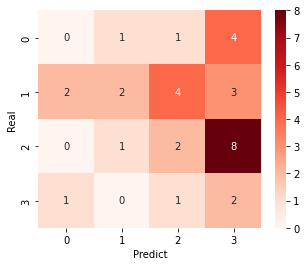

In [ ]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_nav)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")


In [ ]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)

The accuracy was 34.38%


In [ ]:
ext =ExtraTreeClassifier()
ext.fit(x_train, y_train)
y_pred_ex = ext.predict(x_test)
print (accuracy_score(y_test, y_pred_ex)*100)

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_ada= ada.predict(x_test)
print (accuracy_score(y_test, y_pred_ada)*100)

xbg=XGBClassifier()
xbg.fit(x_train, y_train)
y_pred_gb = xbg.predict(x_test)
print (accuracy_score(y_test, y_pred_gb)*100)


31.25
21.875
31.25


In [ ]:
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100


34.375

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


40.625

In [ ]:
lgr= LogisticRegression(solver="liblinear")

model =lgr.fit(x_train,y_train)
y_pred_lgr= model.predict(x_test) 

accuracy_score(y_test, y_pred_lgr)*100

34.375